# Check outputs

inputFiles/SnowArctic/tvc/job_options_file_spinup-final_1peat_30min_ext.txt

- 2013 to 2019 
- metLoop = 40
- spinfast = 1

Annual outputs only

In [1]:
site = 'tvc'
site_longname = 'Trail Valley Creak, northwestern Canada'
y_start = 2013
y_end = 2019
metLoop = 40
spinfast = 1

print('Spinup years: ' + str((y_end-y_start+1)*metLoop) + '\nWith spinfast equivals to: ' + str((y_end-y_start+1)*metLoop*spinfast)) 

Spinup years: 280
With spinfast equivals to: 280


In [2]:
# Env: sc2_v0
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import calendar
import os

In [3]:
exp = '1peat_30min_ext'
path = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowArctic/'+site+'/spinup-final_'+exp

In [4]:
!ls {path}

actlyr_annually.nc	    ftablemax_annually.nc      npp_annually.nc
actlyrmax_annually.nc	    ftablemin_annually.nc      output.txt
actlyrmin_annually.nc	    fVegLitter_annually.nc     pr_annually.nc
albs_annually.nc	    gpp_annually.nc	       ra_annually.nc
cLand_annually.nc	    hfls_annually.nc	       rh_annually.nc
cLeaf_annually.nc	    hfss_annually.nc	       rls_annually.nc
cRoot_annually.nc	    lai_annually.nc	       rmrveg_annually.nc
cSoil_annually.nc	    landCoverFrac_annually.nc  rss_annually.nc
cStem_annually.nc	    mrro_annually.nc	       sftlf.nc
cVeg_annually.nc	    mrsfl_annually.nc	       tas_annually.nc
evspsbl_annually.nc	    mrsll_annually.nc	       tran_annually.nc
fProductDecomp_annually.nc  nbp_annually.nc	       vcmax0_annually.nc
ftable_annually.nc	    nep_annually.nc	       vegHeight_annually.nc


As we generally start the C pools, etc. from zero it takes several runs to spin up sites. Especially the high-latitude sites tend to be slower to spin up. To check whether the model is spun up, we usually look at the outputs for NBP, soil C, etc. to see whether they’re relatively stable or close to zero for NBP averaged over several years. An easy check is to look at the ratio of NEP/NPP. We usually say that a site is spun up, if the absolute value of NEP/NPP is less than 0.02.

In [5]:
freq = 'annually'

tas = xr.open_dataset(path+'/tas_'+freq+'.nc').tas
# snd = xr.open_dataset(path+'/snd_'+freq+'.nc').snd
# snw = xr.open_dataset(path+'/snw_'+freq+'.nc').snw
nbp = xr.open_dataset(path+'/nbp_'+freq+'.nc').nbp # net mass flux of carbon from atmosphere into land
nep = xr.open_dataset(path+'/nep_'+freq+'.nc').nep # Natural flux of CO2 atm -> land
npp = xr.open_dataset(path+'/npp_'+freq+'.nc').npp # Carbon Mass Flux out of Atmosphere due to Net Primary Production
cSoil = xr.open_dataset(path+'/cSoil_'+freq+'.nc').cSoil # Carbon mass in the full depth of the soil model
vegHeight = xr.open_dataset(path+'/vegHeight_'+freq+'.nc').vegHeight

tas

<xarray.DataArray 'tas' (time: 280, lat: 1, lon: 1)> Size: 2kB
[280 values with dtype=float64]
Coordinates:
  * time     (time) object 2kB 2013-12-31 00:00:00 ... 2292-12-31 00:00:00
Dimensions without coordinates: lat, lon
Attributes:
    long_name:   Near-surface air temperature at reference height
    units:       K
    nameInCode:  taacc_yr

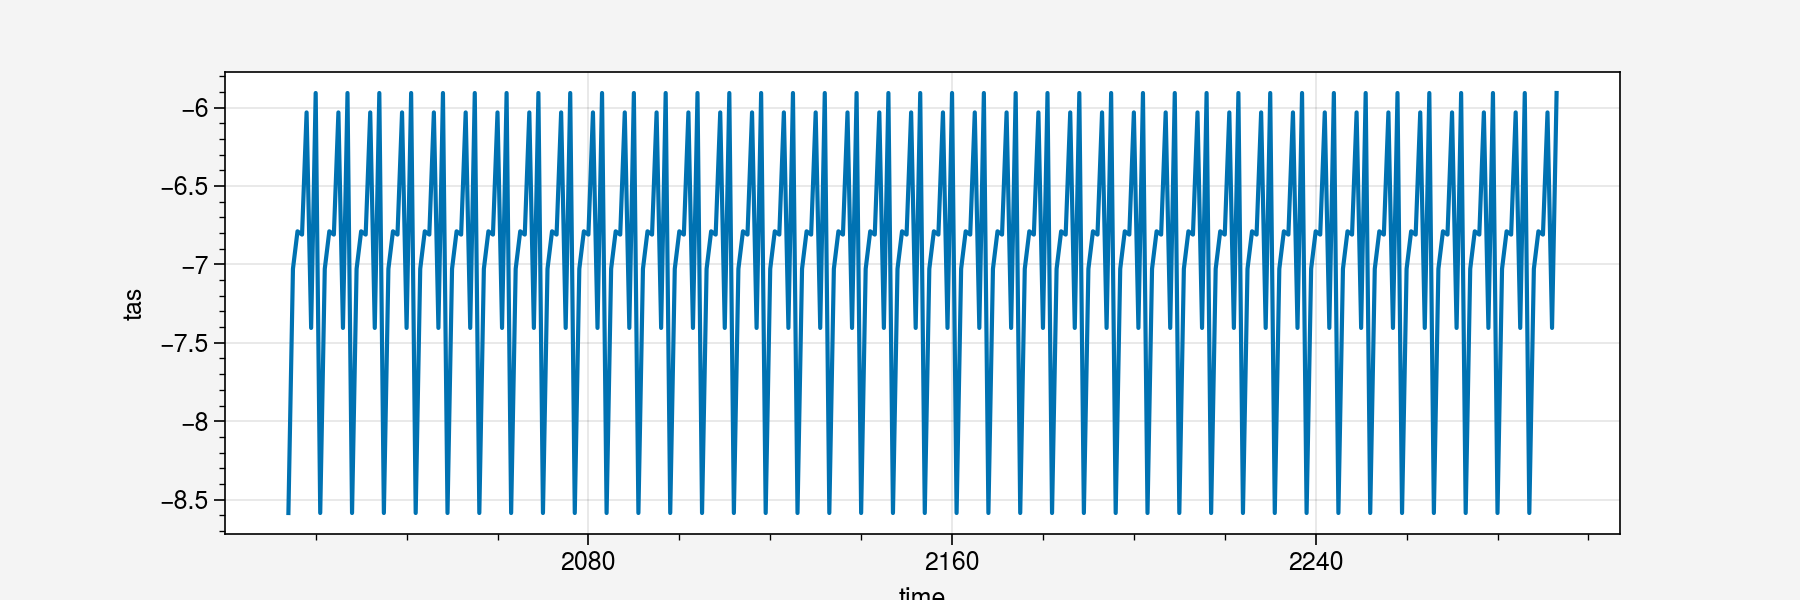

In [6]:
(tas-273.15).plot(aspect=3, size=3)

In [7]:
# snd.plot()

In [8]:
# snw.plot()

## Check the carbon fluxes

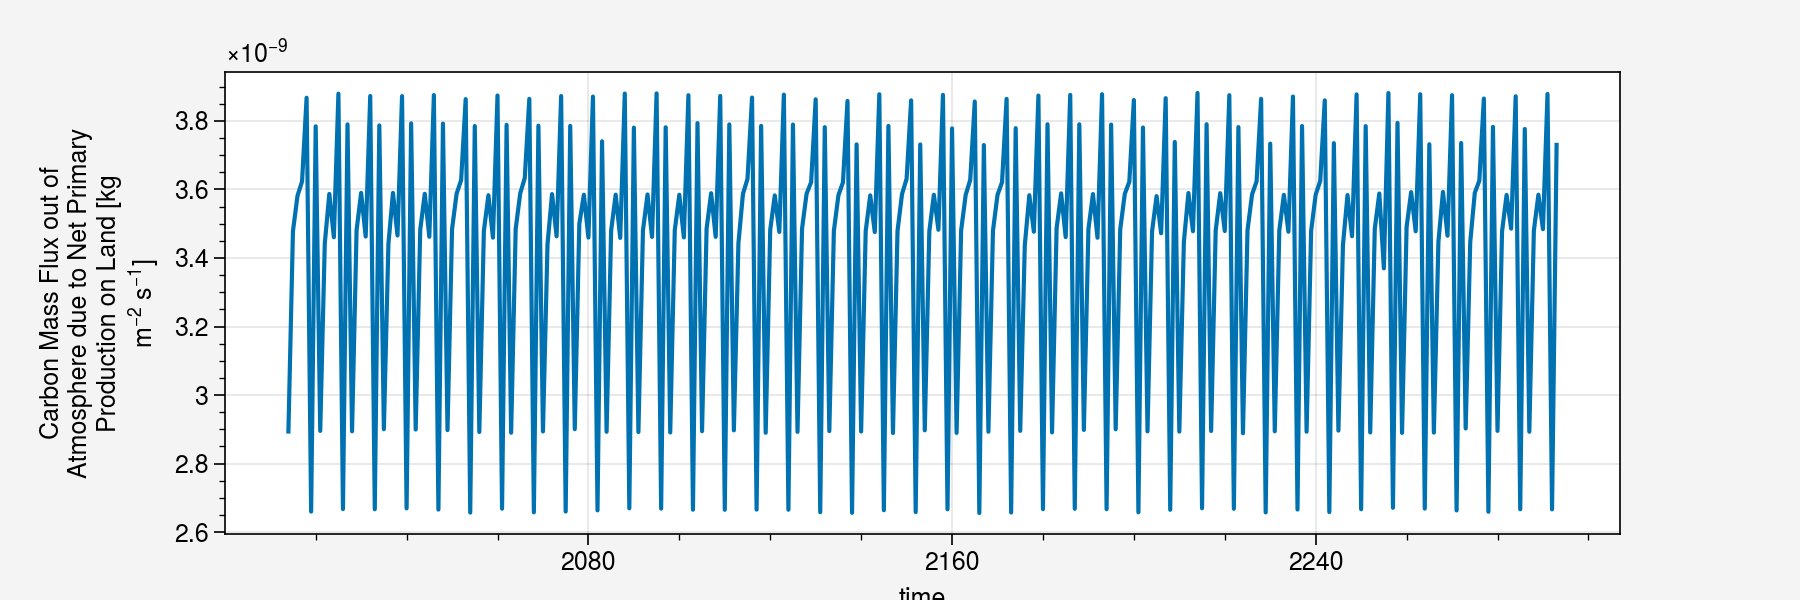

In [9]:
npp.plot(aspect=3, size=3)

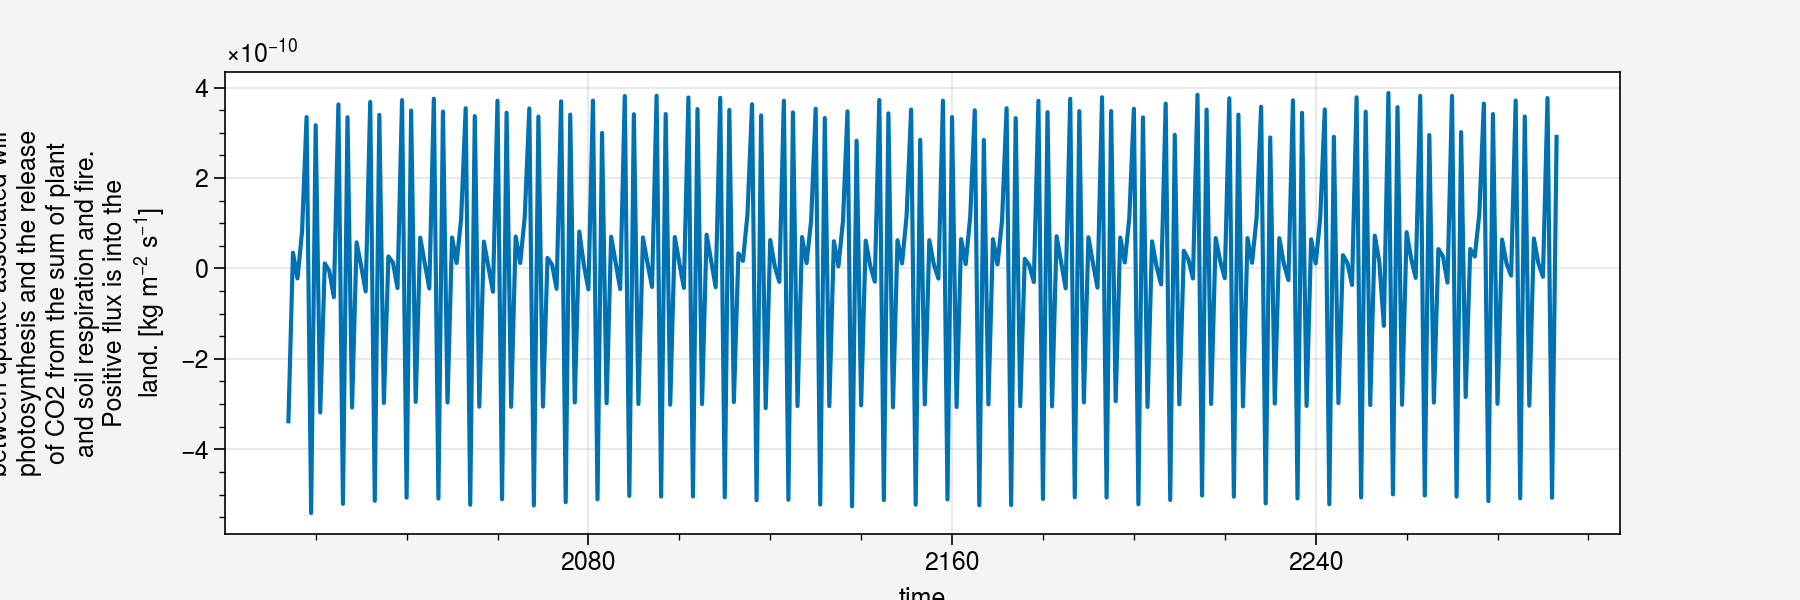

In [10]:
nep.plot(aspect=3, size=3)

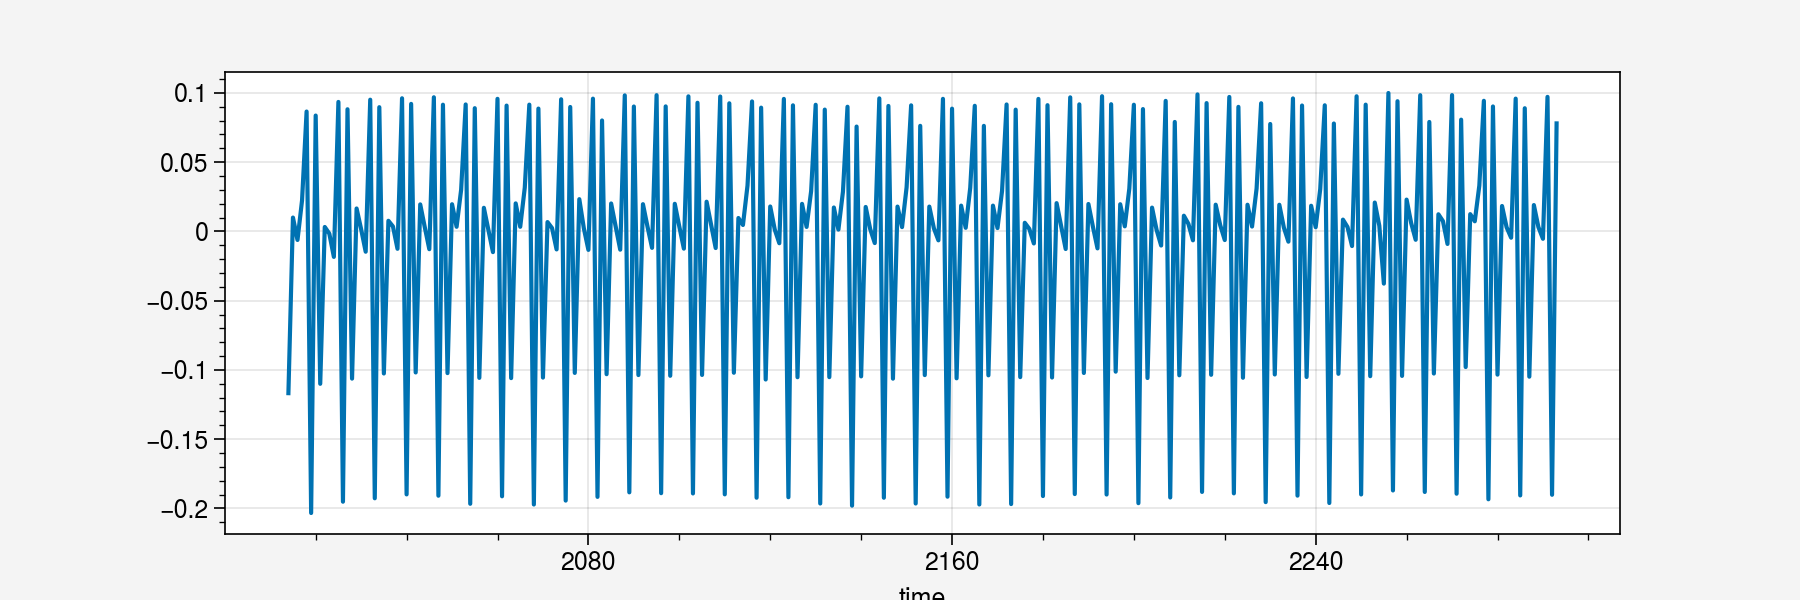

In [11]:
(nep/npp).plot(aspect=3, size=3)

<string>:6: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.


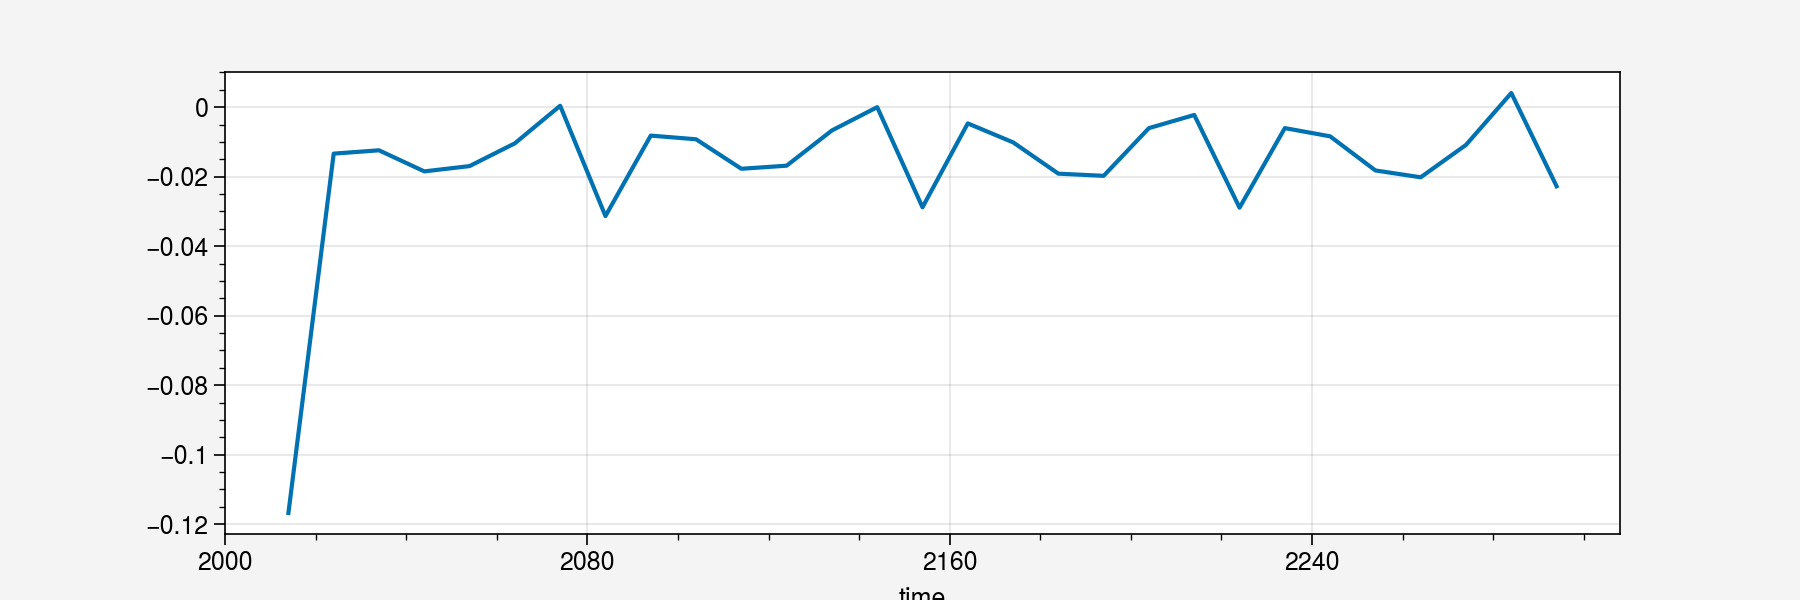

In [12]:
(nep/npp).resample(time='10Y').mean().plot(aspect=3, size=3)

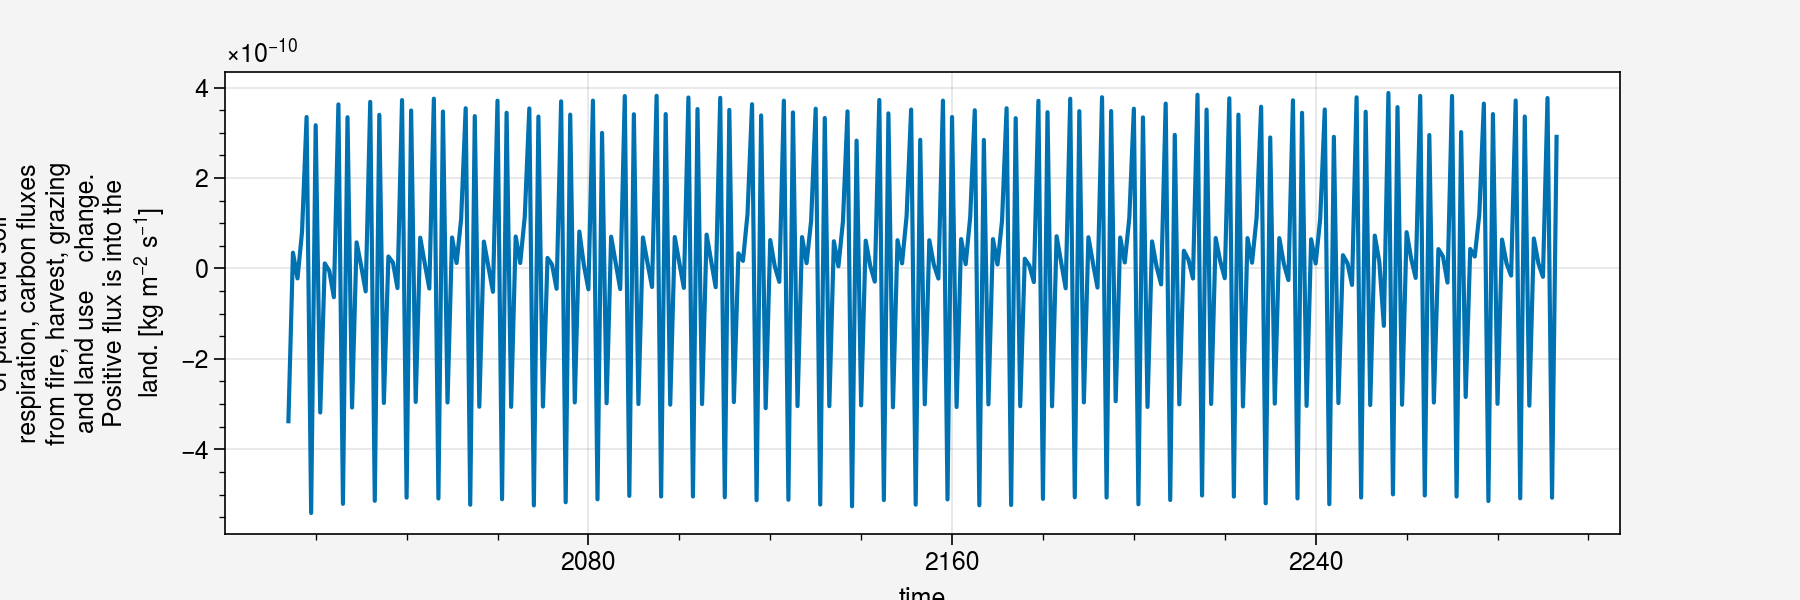

In [13]:
nbp.plot(aspect=3, size=3)

<string>:6: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.


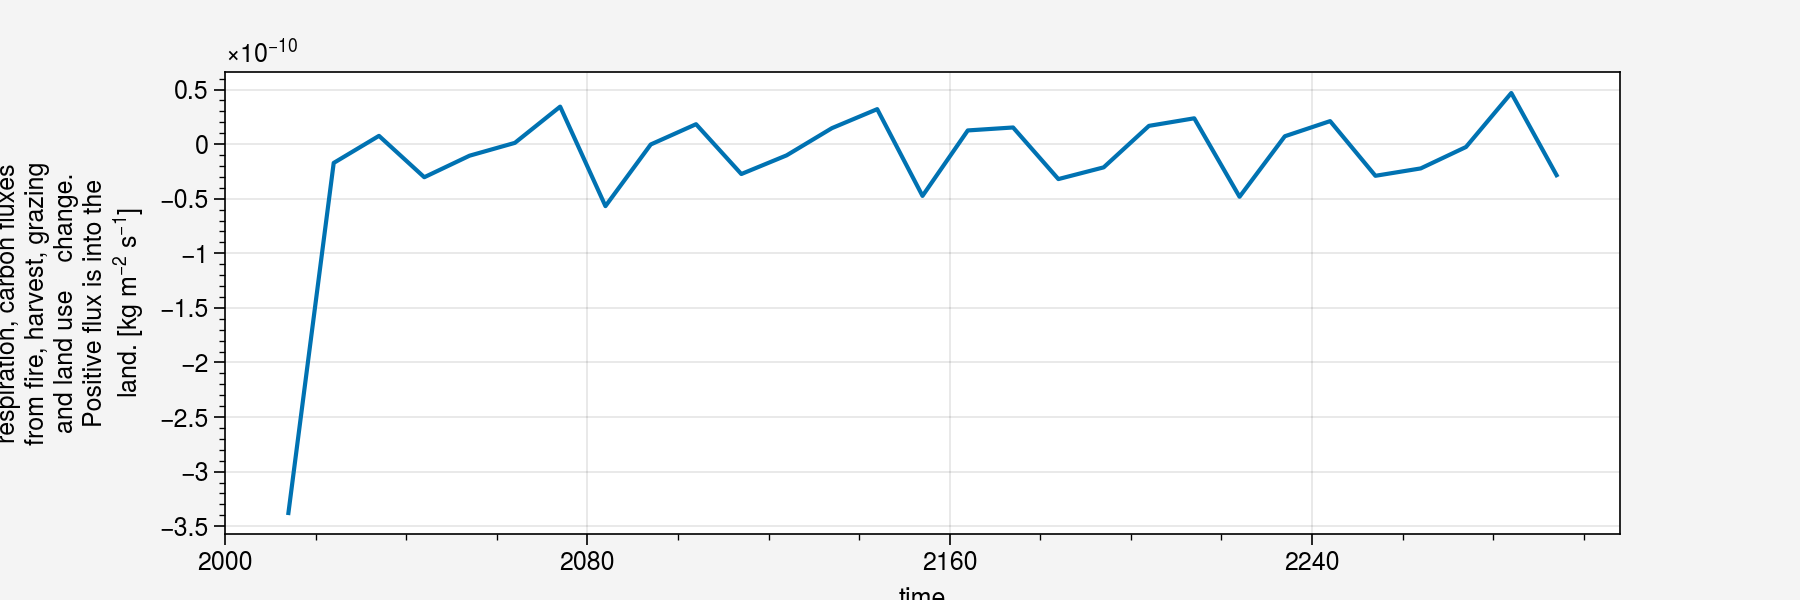

In [14]:
nbp.resample(time='10Y').mean().plot(aspect=3, size=3)

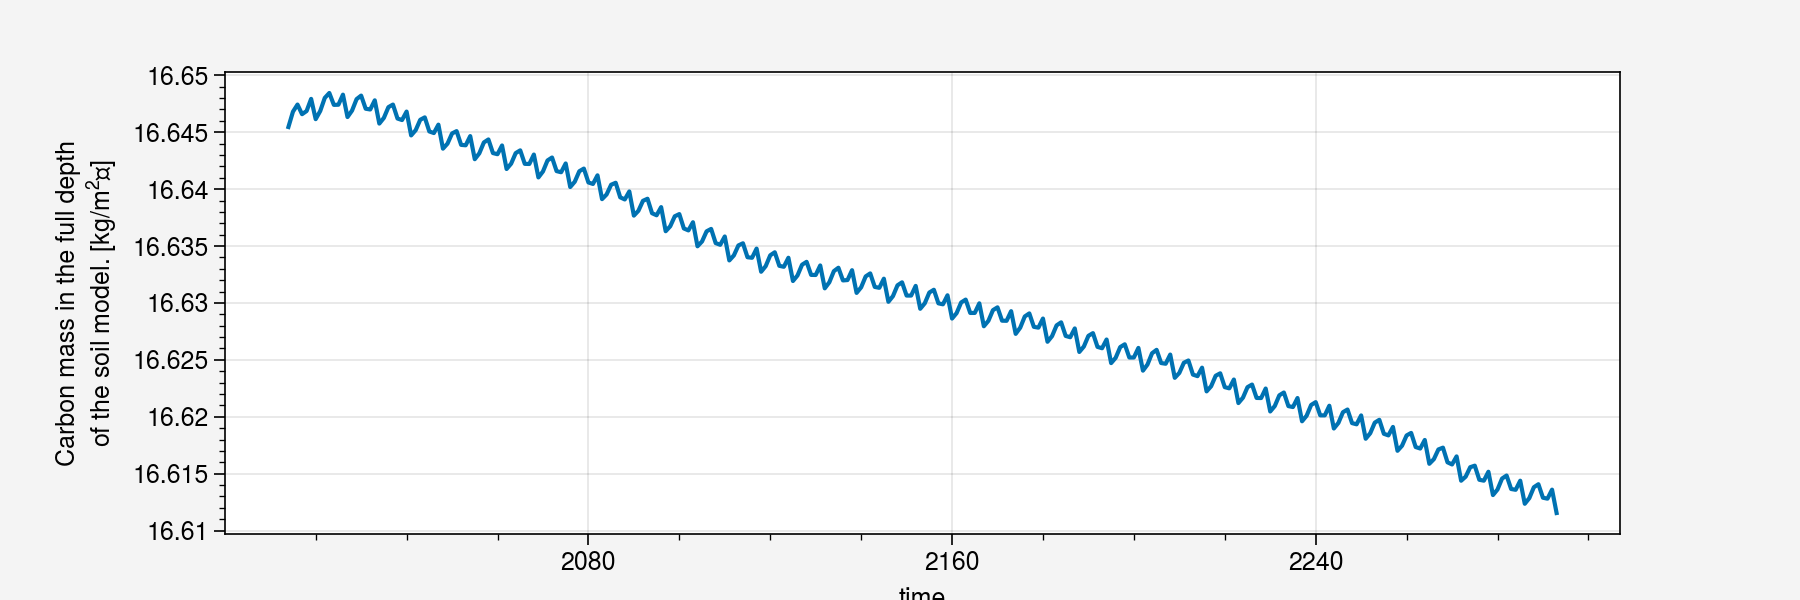

In [15]:
cSoil.plot(aspect=3, size=3)

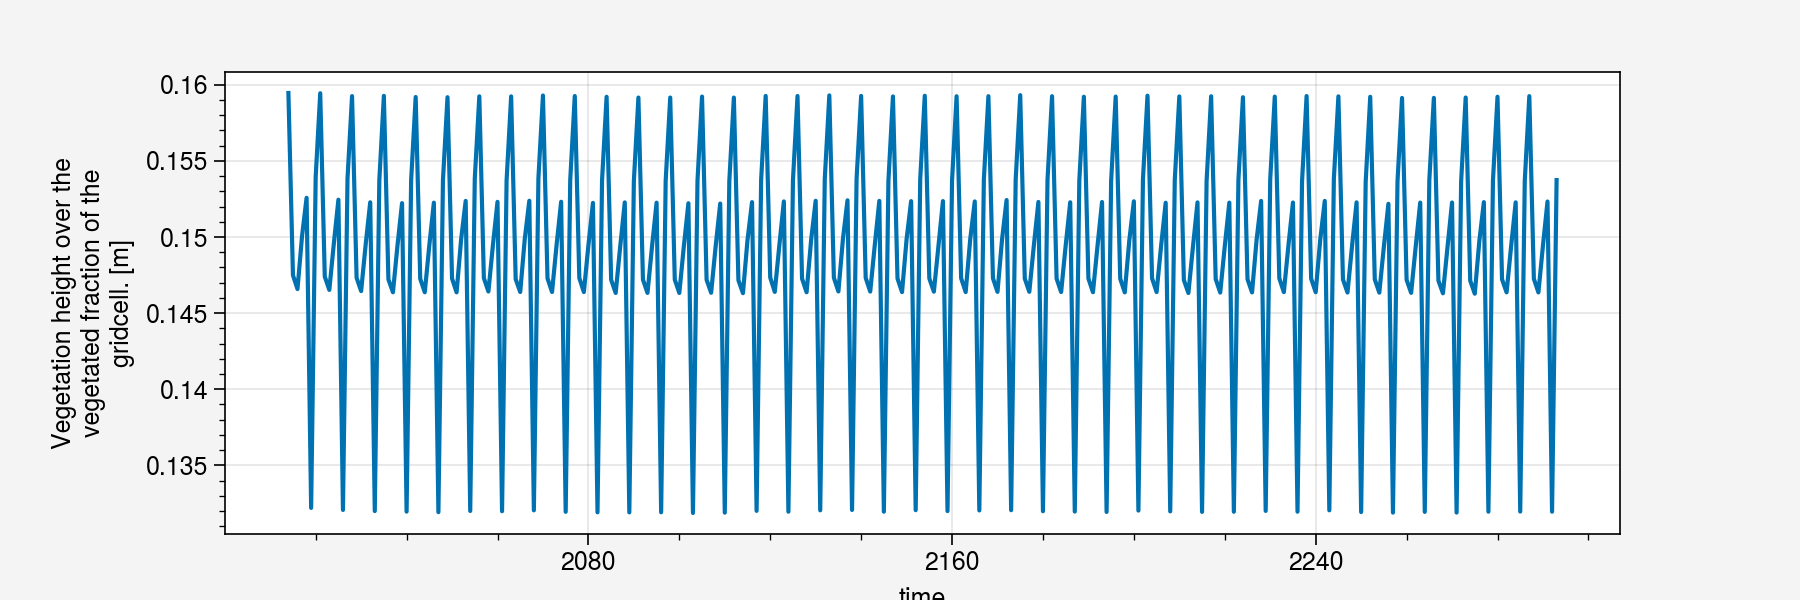

In [16]:
vegHeight.plot(aspect=3, size=3)

In [17]:
cSoil.long_name

'Carbon mass in the full depth of the soil model.'

In [18]:
# fig, axs = pplt.subplots(ncols=3, nrows=3, refaspect=3, refwidth=4, share=0)

# # npp
# axs[0].plot(npp)
# axs[0].format(title='Carbon Mass Flux out of Atmosphere\ndue to Net Primary Production on Land', ylabel='npp ('+npp.units+')')

# # nep
# axs[1].plot(nep)
# axs[1].format(title='Natural flux of CO2 from the atmosphere to the land', ylabel='nep ('+nep.units+')')

# # nep/npp
# axs[2].plot(nep/npp)
# k = axs[2].plot((nep/npp).resample(time='10Y').mean(), label='10Y mean')
# axs[2].plot(nep*0+0.2, color='k', lw=0.5, ls='--')
# axs[2].plot(nep*0-0.2, color='k', lw=0.5, ls='--')
# axs[2].format(title='Ratio nep/npp', ylabel='nep/npp ('+nep.units+')')
# axs[2].legend(k)

# # nbp
# axs[3].plot(nbp)
# axs[3].format(title='Net mass flux of carbon from atmosphere into land', ylabel='nbp ('+nbp.units+')')
# k = axs[3].plot(nbp.resample(time='10Y').mean(), label='10Y mean')
# axs[3].plot(nbp*0+0.2*10e-9, color='k', lw=0.5, ls='--')
# axs[3].plot(nbp*0-0.2*10e-9, color='k', lw=0.5, ls='--')
# axs[3].legend(k)

# # cSoil
# axs[4].plot(cSoil)
# axs[4].format(title='Carbon mass in the full depth of the soil model', ylabel='cSoil ('+cSoil.units+')')

# # vegHeight
# axs[5].plot(vegHeight)
# axs[5].format(title='Vegetation height over the vegetated fraction of the gridcell', ylabel='vegHeight ('+vegHeight.units+')')

# # tas
# axs[6].plot(tas-273.15)
# axs[6].format(title=tas.long_name, ylabel='tas (°C)')

# fig.suptitle('Spinup '+site_longname+' ('+str(y_start)+'-'+str(y_end)+') / metLoop = '+str(metLoop)+'; spinfast = '+str(spinfast))

<string>:6: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.
<string>:6: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.


Text(0.5, 0.98, 'Spinup Trail Valley Creak, northwestern Canada (2013-2019) / metLoop = 40; spinfast = 1')

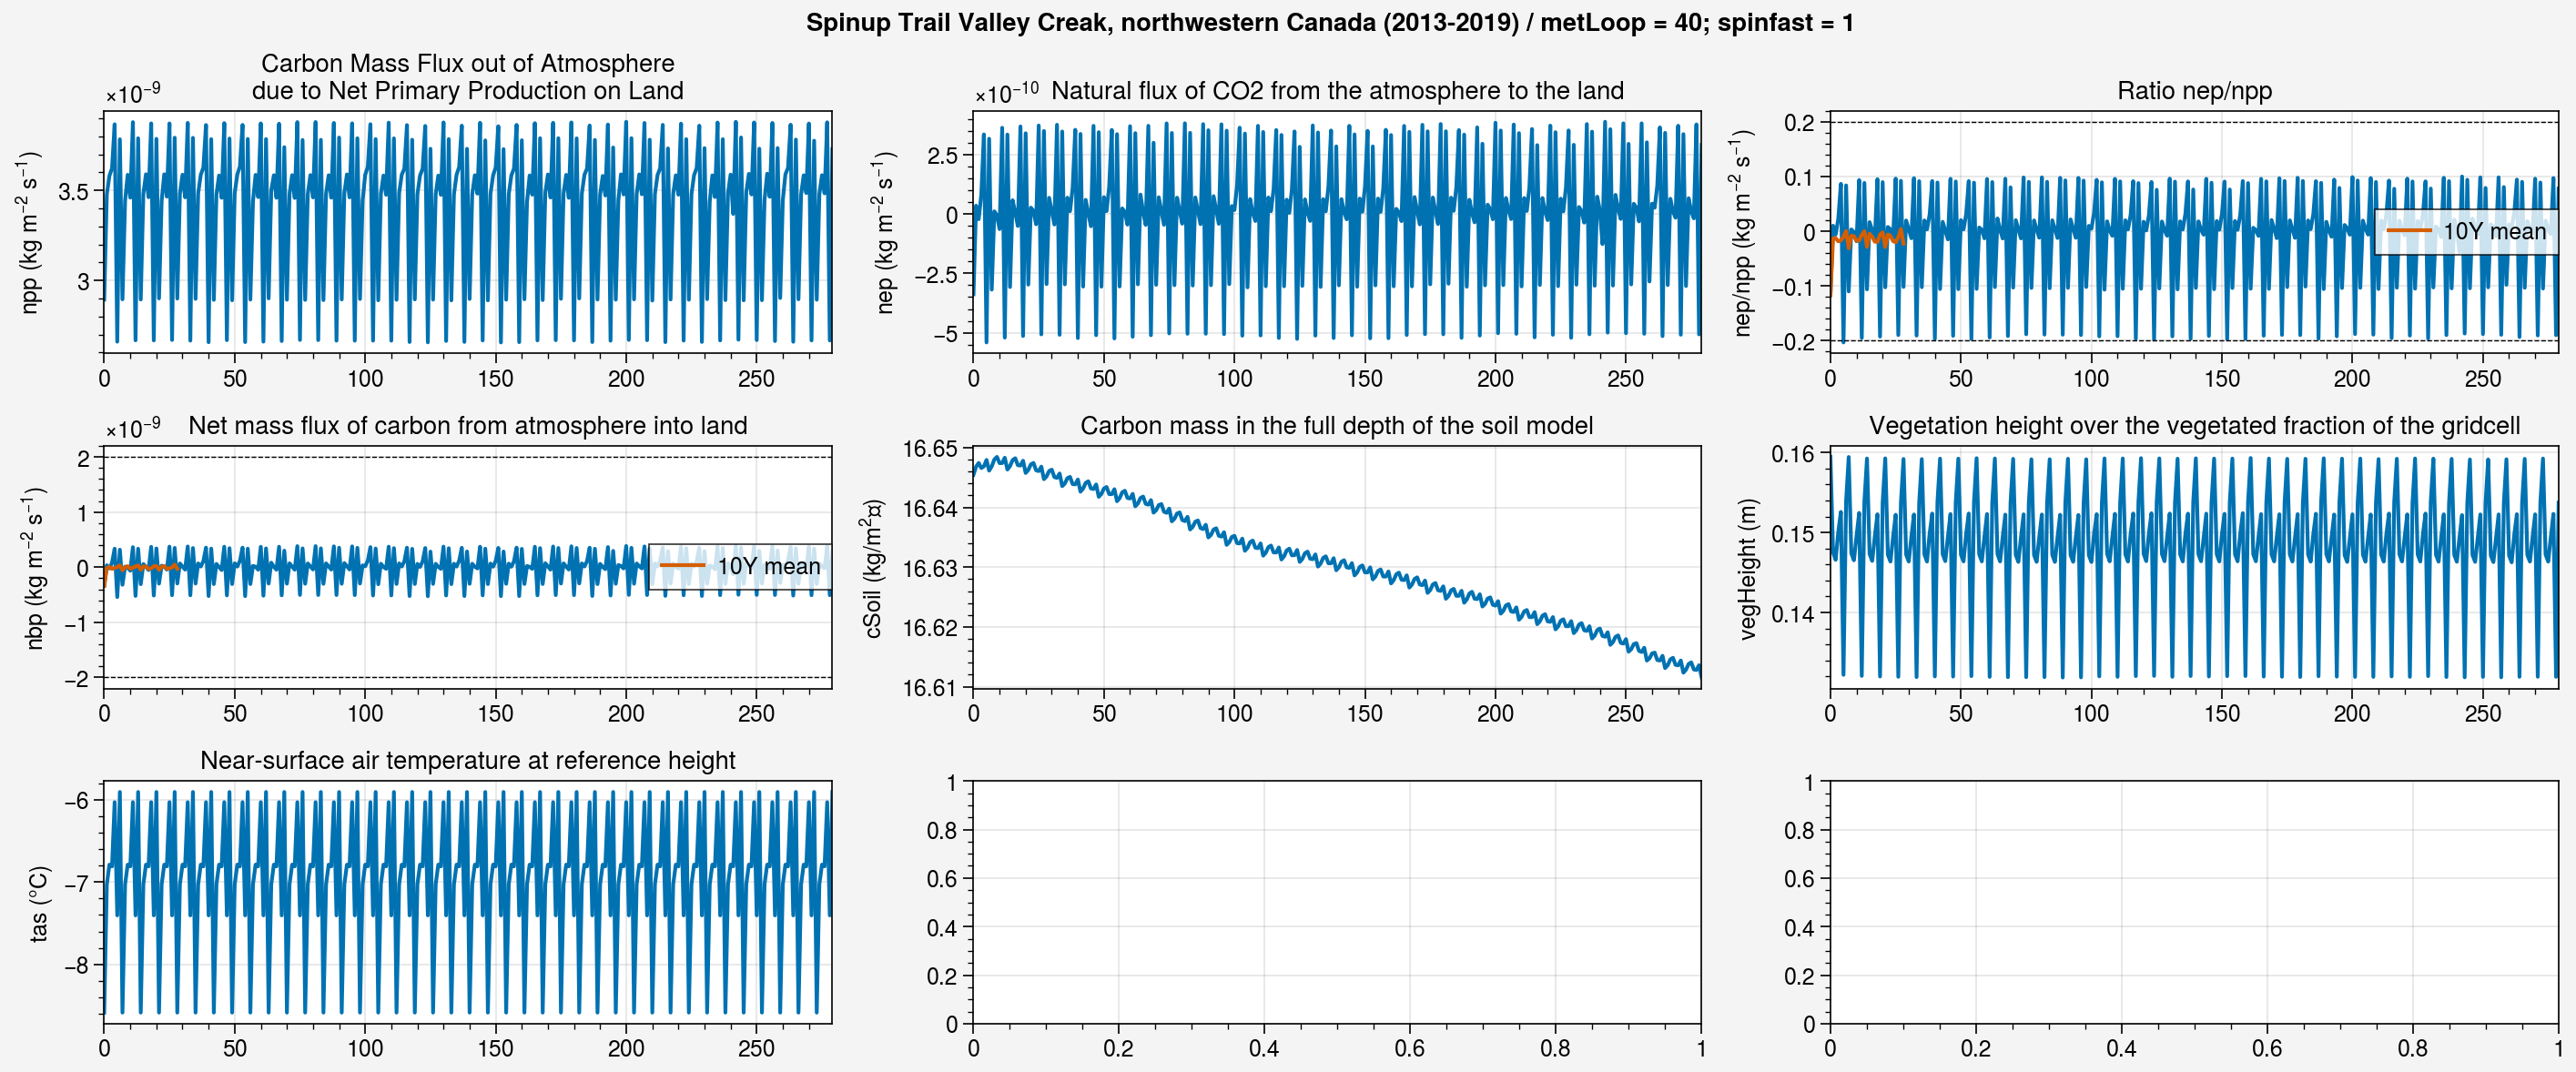

In [19]:
fig, axs = pplt.subplots(ncols=3, nrows=3, refaspect=3, refwidth=4, share=0)

# npp
axs[0].plot(npp.values)
axs[0].format(title='Carbon Mass Flux out of Atmosphere\ndue to Net Primary Production on Land', ylabel='npp ('+npp.units+')')

# nep
axs[1].plot(nep.values)
axs[1].format(title='Natural flux of CO2 from the atmosphere to the land', ylabel='nep ('+nep.units+')')

# nep/npp
axs[2].plot(nep.values/npp.values)
k = axs[2].plot((nep/npp).resample(time='10Y').mean().values, label='10Y mean')
axs[2].plot(nep.values*0+0.2, color='k', lw=0.5, ls='--')
axs[2].plot(nep.values*0-0.2, color='k', lw=0.5, ls='--')
axs[2].format(title='Ratio nep/npp', ylabel='nep/npp ('+nep.units+')')
axs[2].legend(k)

# nbp
axs[3].plot(nbp.values)
axs[3].format(title='Net mass flux of carbon from atmosphere into land', ylabel='nbp ('+nbp.units+')')
k = axs[3].plot(nbp.resample(time='10Y').mean().values, label='10Y mean')
axs[3].plot(nbp.values*0+0.2*10e-9, color='k', lw=0.5, ls='--')
axs[3].plot(nbp.values*0-0.2*10e-9, color='k', lw=0.5, ls='--')
axs[3].legend(k)

# cSoil
axs[4].plot(cSoil.values)
axs[4].format(title='Carbon mass in the full depth of the soil model', ylabel='cSoil ('+cSoil.units+')')

# vegHeight
axs[5].plot(vegHeight.values)
axs[5].format(title='Vegetation height over the vegetated fraction of the gridcell', ylabel='vegHeight ('+vegHeight.units+')')

# tas
axs[6].plot(tas.values-273.15)
axs[6].format(title=tas.long_name, ylabel='tas (°C)')

fig.suptitle('Spinup '+site_longname+' ('+str(y_start)+'-'+str(y_end)+') / metLoop = '+str(metLoop)+'; spinfast = '+str(spinfast))

## Check restart file

In [20]:
path = "/home/lalandmi/eccc/classic-develop/inputFiles/SnowArctic/"+site

In [21]:
rsfile = xr.open_dataset(path+'/rsfile_spinup-final_'+exp+'.nc')
rsfile

<xarray.Dataset> Size: 11kB
Dimensions:            (tile: 1, lat: 1, lon: 1, icp1: 6, layer: 20, ic: 5,
                        icc: 12, iccp1: 13, iccp2: 14, slope: 8)
Coordinates:
  * ic                 (ic) int32 20B 1 2 3 4 5
  * icc                (icc) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
  * iccp1              (iccp1) int32 52B 1 2 3 4 5 6 7 8 9 10 11 12 13
  * iccp2              (iccp2) int32 56B 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * icp1               (icp1) int32 24B 1 2 3 4 5 6
  * slope              (slope) int32 32B 1 2 3 4 5 6 7 8
  * tile               (tile) int32 4B 1
  * layer              (layer) float64 160B 0.05 0.15 0.25 ... 18.9 41.4 58.9
  * lat                (lat) float64 8B 68.75
  * lon                (lon) float64 8B -133.5
Data variables: (12/101)
    ALBS               (tile, lat, lon) float64 8B ...
    ALIC               (tile, icp1, lat, lon) float64 48B ...
    ALVC               (tile, icp1, lat, lon) float64 48B ...
    CLAY               (tile, layer, lat, lon) float64 160B ...
    CMAS               (tile, ic, lat, lon) float64 40B ...
    Cmossmas           (tile, lat, lon) float64 8B ...
    ...                 ...
    stemmass_s         (tile, icc, lat, lon) float64 96B ...
    stmhrlos           (tile, icc, lat, lon) float64 96B ...
    tcoldm             (lat, lon) float32 4B ...
    twarmm             (lat, lon) float32 4B ...
    tymaxlai           (tile, icc, lat, lon) float64 96B ...
    nh4_mass           (tile, iccp1, lat, lon) float32 52B ...
Attributes:
    title:          CLASSIC initialization file created from: /home/acrp001/m...
    creation_date:  20190523
    history:        Wed Jun 12 17:19:01 2019: ncks -4 ./rsfile.nc ./rsfile.nc
    NCO:            4.4.2
    row_bounds:     1 1

In [22]:
cSoil[-1]

<xarray.DataArray 'cSoil' (lat: 1, lon: 1)> Size: 8B
array([[16.611545]])
Coordinates:
    time     object 8B 2292-12-31 00:00:00
Dimensions without coordinates: lat, lon
Attributes:
    long_name:   Carbon mass in the full depth of the soil model.
    units:       kg/m$^2$​
    nameInCode:  soilcmas_yr_g

In [23]:
rsfile.fcancmx.squeeze().values

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.6 , 0.05,
       0.28])

In [24]:
total = []
for i, fcancmx in enumerate(rsfile.fcancmx.squeeze().values):
    total.append(fcancmx*rsfile.soilcmas[0, :, i, 0, 0].sum())

np.sum(total)

16.611544519285065

In [25]:
exp

'1peat_30min_ext'

In [26]:
site

'tvc'

In [27]:
!cp {path}/rsfile_spinup-final_{exp}.nc {path}/{site}_init_run_{exp}.nc
!cp {path}/rsfile_spinup-final_{exp}.nc {path}/rsfile_run_{exp}.nc
!mkdir /home/lalandmi/eccc/classic-develop/outputFiles/SnowArctic/{site}/run_{exp}